Certification_case_study2

In [95]:
import pandas as pd
import numpy as np
export = pd.read_csv('C:\edureka\certification\Data_set\Project_Data_1.csv',thousands = ',')
export.rename(columns = {'Sales of Wheat in tons':'Country'}, inplace = True)
export.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [96]:
export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
Country    207 non-null object
1990       207 non-null int64
1991       207 non-null int64
1992       207 non-null int64
1993       207 non-null int64
1994       207 non-null int64
1995       207 non-null int64
1996       207 non-null int64
1997       207 non-null int64
1998       207 non-null int64
1999       207 non-null int64
2000       207 non-null int64
2001       207 non-null int64
2002       207 non-null int64
2003       207 non-null int64
2004       207 non-null int64
2005       207 non-null int64
2006       207 non-null int64
2007       207 non-null int64
dtypes: int64(18), object(1)
memory usage: 30.9+ KB


In [99]:
export.set_index('Country', inplace=True)
export.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


Conducting PCA to reduce dimensions

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(export)
export_pca = pca.transform(export)
export_pca_dataframe = pd.DataFrame(export_pca,columns = ['Dimension 1', 'Dimension 2'], index = export.index)
export_pca_dataframe.head()

,Dimension 1,Dimension 2
Country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [102]:
print (pca.explained_variance_ratio_)
import numpy as np
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

[0.91808789 0.060556  ]


array([91.8,  6.1])

scree plot - PC1 and PC2 considers >95% of the variance

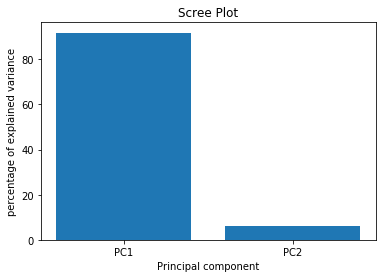

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x = range(1,len(per_var)+1),height = per_var,tick_label = labels)
plt.ylabel("percentage of explained variance")
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

scatter plot

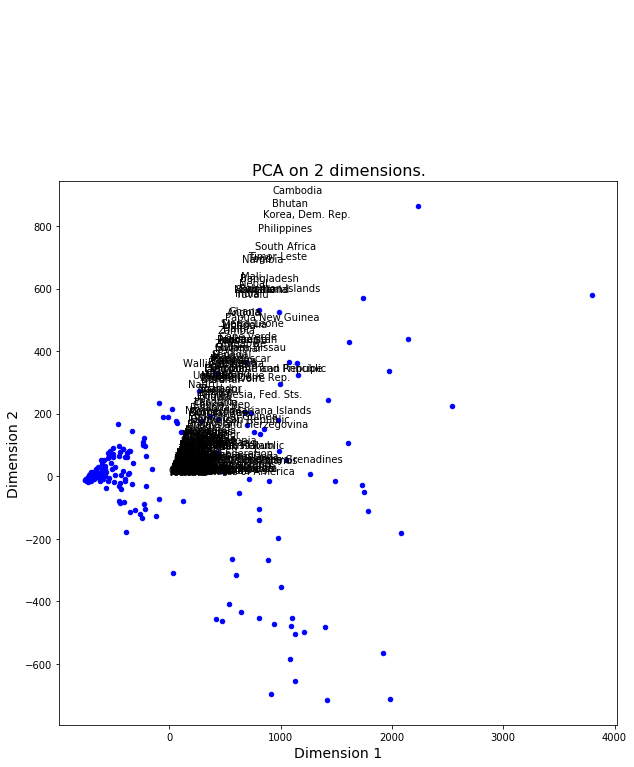

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.scatter(x=export_pca_dataframe.loc[:, 'Dimension 1'], y=export_pca_dataframe.loc[:, 'Dimension 2'],c='blue', s = 20)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.title("PCA on 2 dimensions.", fontsize=16)
for i, country in enumerate(export.index):
    plt.annotate(country, (export.iloc[i,0], export.iloc[i,1]))

In [113]:
#mean exports of each country
export_pca_dataframe['mean'] = export.mean(axis=1)
export_pca_dataframe.head()

,Dimension 1,Dimension 2,mean
Country,,,
Afghanistan,732.215864,203.381494,353.333333
Albania,-613.296510,4.715978,36.944444
Algeria,-569.303713,-36.837051,47.388889
American Samoa,-717.082766,5.464696,12.277778
Andorra,-661.802241,11.037736,25.277778


In [114]:
#total export of each country
export_pca_dataframe['total_export'] = export.sum(axis=1)
export_pca_dataframe.head()

,Dimension 1,Dimension 2,mean,total_export
Country,,,,
Afghanistan,732.215864,203.381494,353.333333,6360
Albania,-613.296510,4.715978,36.944444,665
Algeria,-569.303713,-36.837051,47.388889,853
American Samoa,-717.082766,5.464696,12.277778,221
Andorra,-661.802241,11.037736,25.277778,455


In [122]:
#export variance from 1990 to 2007
export_pca_dataframe['growth_trend'] = export['2007'] -export['1992']
export_pca_dataframe.head()

,Dimension 1,Dimension 2,mean,total_export,growth_trend
Country,,,,,
Afghanistan,732.215864,203.381494,353.333333,6360,-184
Albania,-613.296510,4.715978,36.944444,665,-19
Algeria,-569.303713,-36.837051,47.388889,853,12
American Samoa,-717.082766,5.464696,12.277778,221,1
Andorra,-661.802241,11.037736,25.277778,455,-16


scaling the data

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(export_pca_dataframe)
X_df = pd.DataFrame(X, columns = export_pca_dataframe.columns, index = export_pca_dataframe.index)
X_df

,Dimension 1,Dimension 2,mean,total_export,growth_trend
Country,,,,,
Afghanistan,0.860409,0.930552,0.858182,0.858182,-1.161102
Albania,-0.720670,0.021577,-0.721020,-0.721020,0.048040
Algeria,-0.668975,-0.168544,-0.668888,-0.668888,0.275212
American Samoa,-0.842626,0.025003,-0.844139,-0.844139,0.194603
Andorra,-0.777668,0.050502,-0.779252,-0.779252,0.070024
...,...,...,...,...,...
Wallis et Futuna,-0.271908,0.563127,-0.275405,-0.275405,-0.098523
West Bank and Gaza,-0.687684,0.066176,-0.688853,-0.688853,0.018727
Yemen,0.069631,0.812303,0.064560,0.064560,-0.787367


K Means Clustering and finding the best number of clusters by plotting intertia and findinf the elbow point

Text(0, 0.5, 'scores')

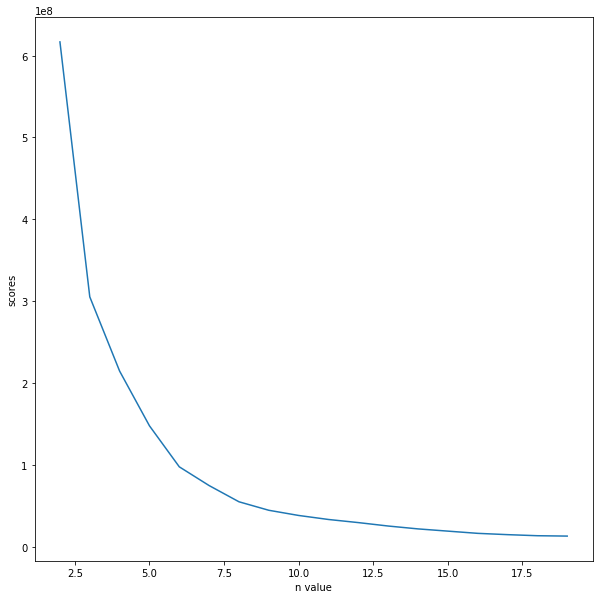

In [126]:
from sklearn.cluster import KMeans
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_predict(export_pca_dataframe)
    scores.append(km.inertia_)
scores 
# plot the results
plt.plot(k_range,scores)
plt.xlabel('n value')
plt.ylabel('scores')  

n_cluster = 6 is the eblow point

measuring silhouette coeff with n = 6

In [133]:
from sklearn import metrics
km = KMeans(n_clusters=6, random_state=1)
km.fit(export_pca_dataframe)
print(metrics.silhouette_score(export_pca_dataframe, km.labels_))

0.5690941564441423


scatter plot of clusters

In [138]:
export_pca_dataframe['cluster_label'] = km.labels_
export_pca_dataframe.head()

,Dimension 1,Dimension 2,mean,total_export,growth_trend,cluster_label
Country,,,,,,
Afghanistan,732.215864,203.381494,353.333333,6360,-184,0
Albania,-613.296510,4.715978,36.944444,665,-19,3
Algeria,-569.303713,-36.837051,47.388889,853,12,3
American Samoa,-717.082766,5.464696,12.277778,221,1,3
Andorra,-661.802241,11.037736,25.277778,455,-16,3


In [142]:
center = pd.DataFrame(km.cluster_centers_,columns = ['Dimension 1','Dimension 2', 'mean','total_export','growth_trend'], index = [0,1,2,3,4,5])
center

,Dimension 1,Dimension 2,mean,total_export,growth_trend
0,597.213785,5.694716,322.251029,5800.518519,-37.740741
1,-271.094622,19.489120,117.600000,2116.800000,-31.740000
2,1931.686191,101.554057,635.645299,11441.615385,-118.461538
3,-650.407021,10.242624,28.040904,504.736264,-18.010989
4,1108.265197,-158.378803,443.580000,7984.440000,34.160000
5,3798.447446,578.975277,1064.166667,19155.000000,-359.000000


scatter plot

In [143]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'orange','purple','yellow'])
colors

array(['red', 'green', 'blue', 'orange', 'purple', 'yellow'], dtype='<U6')

In [144]:
c = colors[export_pca_dataframe['cluster_label']]
c

array(['red', 'orange', 'orange', 'orange', 'orange', 'purple', 'orange',
       'orange', 'orange', 'green', 'orange', 'orange', 'green', 'orange',
       'green', 'purple', 'orange', 'green', 'orange', 'orange', 'green',
       'orange', 'blue', 'red', 'green', 'purple', 'green', 'orange',
       'green', 'orange', 'red', 'purple', 'blue', 'green', 'orange',
       'red', 'orange', 'purple', 'purple', 'orange', 'red', 'orange',
       'green', 'red', 'orange', 'orange', 'green', 'orange', 'orange',
       'orange', 'purple', 'blue', 'purple', 'orange', 'yellow', 'orange',
       'green', 'green', 'orange', 'green', 'red', 'green', 'orange',
       'purple', 'orange', 'orange', 'orange', 'orange', 'red', 'red',
       'green', 'orange', 'purple', 'orange', 'orange', 'green', 'green',
       'red', 'red', 'green', 'purple', 'green', 'orange', 'orange',
       'purple', 'red', 'orange', 'green', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'green', 'red', 'blue', '

Text(0, 0.5, 'Dimension 2')

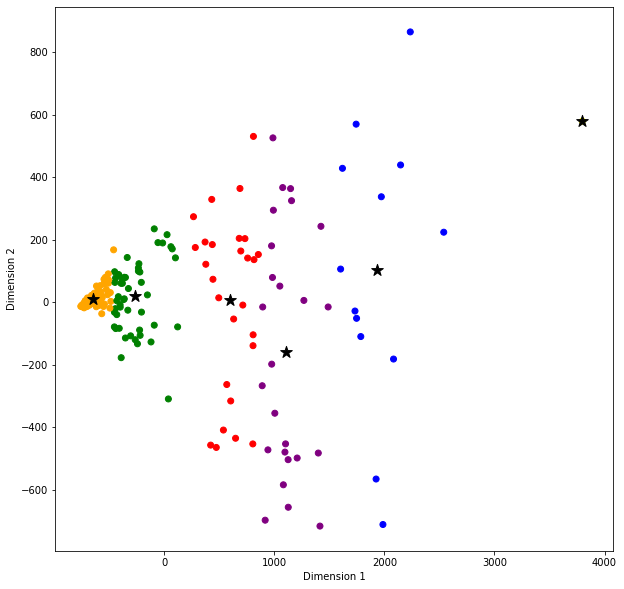

In [149]:
plt.scatter(export_pca_dataframe['Dimension 1'],export_pca_dataframe['Dimension 2'], c = colors[export_pca_dataframe['cluster_label']])
plt.scatter(center['Dimension 1'],center['Dimension 2'],marker = '*', color = 'black', s=150)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

using seaborn

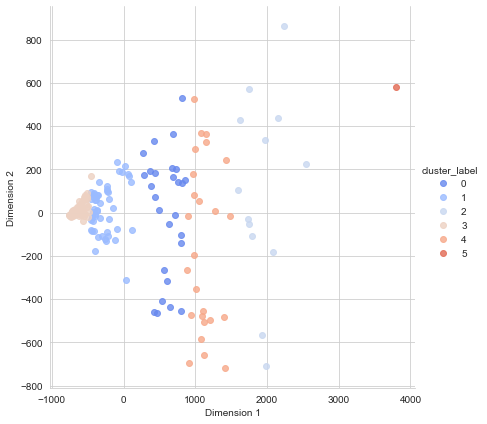

In [151]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('Dimension 1', 'Dimension 2', data = export_pca_dataframe[['Dimension 1', 'Dimension 2','cluster_label']], hue='cluster_label',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)


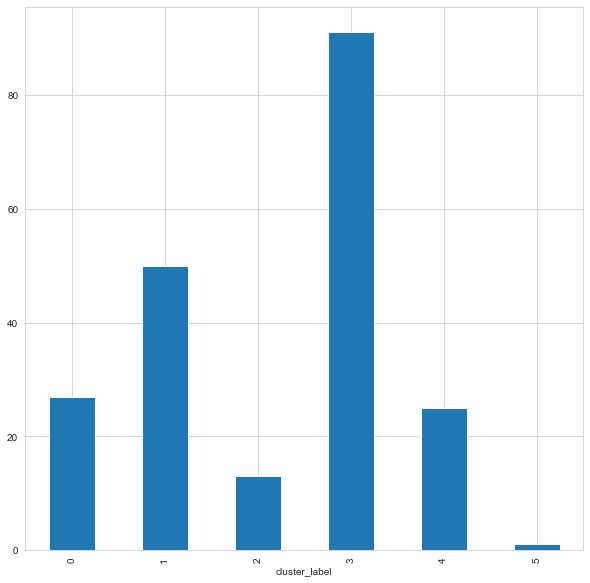

In [154]:
label_count = export_pca_dataframe.groupby('cluster_label').cluster_label.count()
label_count.plot(kind = 'bar')